In [6]:
#Linear Algebra
import numpy as np #linear Algebra 
import pandas as pd # for reading csv files 

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [30]:
train_csv = pd.read_csv('/Users/hamsinisankaran/Downloads/titanic/train.csv')
test_csv = pd.read_csv('/Users/hamsinisankaran/Downloads/titanic/test.csv')

#counting the number of examples in the training and the test dataset 
print('There are %s examples in the training set and %s examples in the test set'% (train_csv.shape[0], test_csv.shape[0]))
print('\n')
print('The different variables that we have at our disposal are : %s' % ','.join(list(train_csv.columns)))

There are 891 examples in the training set and 418 examples in the test set


The different variables that we have at our disposal are : PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


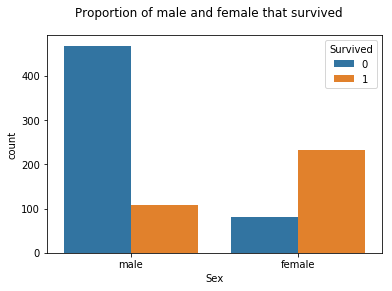

In [31]:
plt.figure()
plt.suptitle('Proportion of male and female that survived')
g = sns.countplot(x="Sex", hue='Survived', data=train_csv);
plt.show()

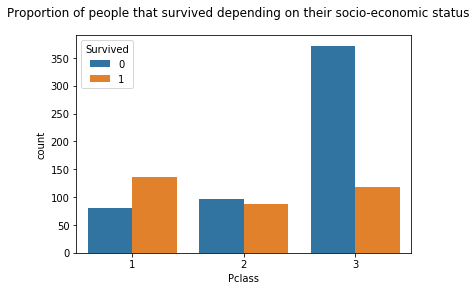

In [32]:
plt.figure()
plt.suptitle('Proportion of people that survived depending on their socio-economic status')
g = sns.countplot(x="Pclass", hue='Survived', data=train_csv);
plt.show()

In [33]:
#model building 
def label_encoding(dataframe, labels):
    """
    Encode categorical variable into numerical values
    """
    le = LabelEncoder()
    for label in labels:
        le.fit(dataframe[label])
        dataframe[label] = le.transform(dataframe[label])

    return dataframe

def normalize_features(X_train):
    """"""
    #Normalize the features by substracting the mean 
    #and dividing by the standard deviation
    """"""
    for features in X_train:
        feats = X_train[features].tolist()
        mean = np.mean(feats)
        std = np.std(feats)
        feats = (feats - mean)/std
        X_train[features] = feats
    return X_train

def get_training_data():
    "clean the data by preprocessing and removing the nan values"
    train_csv = pd.read_csv('/Users/hamsinisankaran/Downloads/titanic/train.csv')
    train_csv['Cabin'] = train_csv['Cabin'].fillna('C0')
    train_csv['Embarked'] = train_csv['Embarked'].fillna('0')
    train_csv['Age'] = train_csv['Age'].fillna(train_csv['Age'].mean())
    train_csv = label_encoding(train_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])
    X_train = train_csv[['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    Y_train = train_csv['Survived']
    normalize_features(X_train)
    return X_train.as_matrix(), Y_train.as_matrix()

def get_testing_data():
    test_csv = pd.read_csv('/Users/hamsinisankaran/Downloads/titanic/test.csv')
    test_csv['Cabin'] = test_csv['Cabin'].fillna('C0')
    test_csv['Embarked'] = test_csv['Embarked'].fillna('0')
    test_csv['Age'] = test_csv['Age'].fillna(test_csv['Age'].mean())
    test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].mean())
    test_csv = label_encoding(test_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])
    X_test = test_csv[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    normalize_features(X_test)
    return X_test.as_matrix(), test_csv['PassengerId']


In [34]:
#logistic Regression

In [64]:
X_train, Y_train = get_training_data()
# Hyperparameters initialization
lr = 0.05

#parameters initialization 
weights = np.random.normal(0, 0.1, 9)
biais = random.normalvariate(0, 0.1)

m = X_train.shape[0]
for epoch in range(300):
    
    # Forward pass
        Z = np.dot(X_train, weights) + biais
        A = 1 / (1 + np.exp(-Z))
        
    #Loss Computation
        J = np.sum(-(Y_train * np.log(A) + (1 - Y_train) * np.log(1 - A))) / m
    
    # Gradient computation
        dZ = A - Y_train
        dw = np.dot(dZ, X_train) / m
        db = np.sum(dZ) / m

        # Update weights
        weights = weights - lr * dw
        biais = biais - lr * db

        if epoch % 10 == 0:
            print("epoch %s - loss %s" % (epoch, J))

         
            

epoch 0 - loss 0.7047537856866997
epoch 10 - loss 0.6390524840507827
epoch 20 - loss 0.5938013796219711
epoch 30 - loss 0.5616522018558876
epoch 40 - loss 0.5380859792344106
epoch 50 - loss 0.5203230983358994
epoch 60 - loss 0.5066115230465729
epoch 70 - loss 0.49581175096627556
epoch 80 - loss 0.4871590002241981
epoch 90 - loss 0.48012484671245614
epoch 100 - loss 0.4743345492207695
epoch 110 - loss 0.46951616512872646
epoch 120 - loss 0.46546830638341297
epoch 130 - loss 0.46203914129078233
epoch 140 - loss 0.45911237273834593
epoch 150 - loss 0.4565976593416599
epoch 160 - loss 0.4544239355094761
epoch 170 - loss 0.4525346654967542
epoch 180 - loss 0.4508844141415142
epoch 190 - loss 0.449436330757576
epoch 200 - loss 0.44816027711321826
epoch 210 - loss 0.44703141678208175
epoch 220 - loss 0.4460291396985031
epoch 230 - loss 0.44513623344300357
epoch 240 - loss 0.4443382383283655
epoch 250 - loss 0.4436229409344976
epoch 260 - loss 0.4429799730080692
epoch 270 - loss 0.442400491317

In [68]:
#Logistic Regression Prediction 
X_test, PassengerId = get_testing_data()

preds = []
for feats in X_test:
    z = np.dot(feats, weights) + biais
    a = 1 / (1 + np.exp(-z))

    if a > 0.5:
        preds.append(1)
    elif a <= 0.5:
        preds.append(0)
sample_ids = np.random.choice(PassengerId, 100)

for id, value in enumerate(sample_ids):
     mylist = ['Passenger id \t  Survived \n %s %s' % (value, preds[id])]
        
out = csv.writer(open("myfile.csv","w"), delimiter=',')
out.writerow(mylist)
        
#gendermodel_csv = pd.read_csv('/Users/hamsinisankaran/Downloads/titanic/gender_submission.csv')
#accuracy = accuracy_score(list(gendermodel_csv['Survived']), preds)
#print('\n')
#print('The accuracy of the model is of %s : ' % accuracy)
        

37